In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import shutil
import os

drive_kaggle_path = "/content/drive/MyDrive/kaggle_json/kaggle.json"

os.makedirs("/root/.kaggle", exist_ok=True)
shutil.copy(drive_kaggle_path, "/root/.kaggle/kaggle.json")

!chmod 600 /root/.kaggle/kaggle.json

In [3]:
!kaggle competitions download -c dl-2025-study-competition-2

  0% 0.00/12.9M [00:00<?, ?B/s]
100% 12.9M/12.9M [00:00<00:00, 1.27GB/s]


In [4]:
!unzip dl-2025-study-competition-2.zip -d /content/data

Archive:  dl-2025-study-competition-2.zip
  inflating: /content/data/sample_submission.csv  
  inflating: /content/data/test.csv  
  inflating: /content/data/train.csv  


In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

train_df = pd.read_csv('/content/data/train.csv')
test_df = pd.read_csv('/content/data/test.csv')

print("Train Data:")
display(train_df.head())
print("\nTest Data:")
display(test_df.head())

print("\nTrain Info:")
train_df.info()
print("\nTest Info:")
test_df.info()

Train Data:


,id,text,labels
0,0,15 января\nДетская развлекательная программа\n...,1 0 0 0 1 0 0 0 1 0 0 0 1 1 1 1 1 0 0 1
1,1,13 и 14 августа\nВыходные в Меге\nhttps://t.me...,0 0 0 1 0 0 0 0 1 0 0 0 1 1 0 1 1 0 0 1
2,2,Йокнапатофа\nПостановка Театр им. Маяковского\...,0 0 0 0 1 0 0 0 0 0 0 0 1 1 0 1 1 0 0 1
3,3,Впервые в Уфе танцевальная терапия в группе с ...,1 1 0 0 1 0 0 1 1 1 1 1 1 1 1 0 0 1 1 0
4,4,"🎹\nGRAND PIANO COMPETITION\n🎹\nДрузья, сегодня...",1 1 0 0 0 0 0 1 1 0 0 1 1 1 1 0 1 1 1 0



Test Data:


,id,text
0,29568,"ЭЙ, ВЛЮБЛЁННЫЕ\nСкидка 20% промокоду SYHOYZ\nн..."
1,29569,Пруды Москвы
2,29570,🤪\n🤪\n👏\n👏\n😄\n😄\n👏\n👏\n👨‍👩‍👦\nСемейка лёгкого...
3,29571,24 СЕНТЯБРЯ\nИсторический фестиваль «Башкирия ...
4,29572,19-20 августа\nДетский клуб в кафе «Отдых»\nТе...



Train Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29568 entries, 0 to 29567
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      29568 non-null  int64 
 1   text    29568 non-null  object
 2   labels  29568 non-null  object
dtypes: int64(1), object(2)
memory usage: 693.1+ KB

Test Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7392 entries, 0 to 7391
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      7392 non-null   int64 
 1   text    7392 non-null   object
dtypes: int64(1), object(1)
memory usage: 115.6+ KB


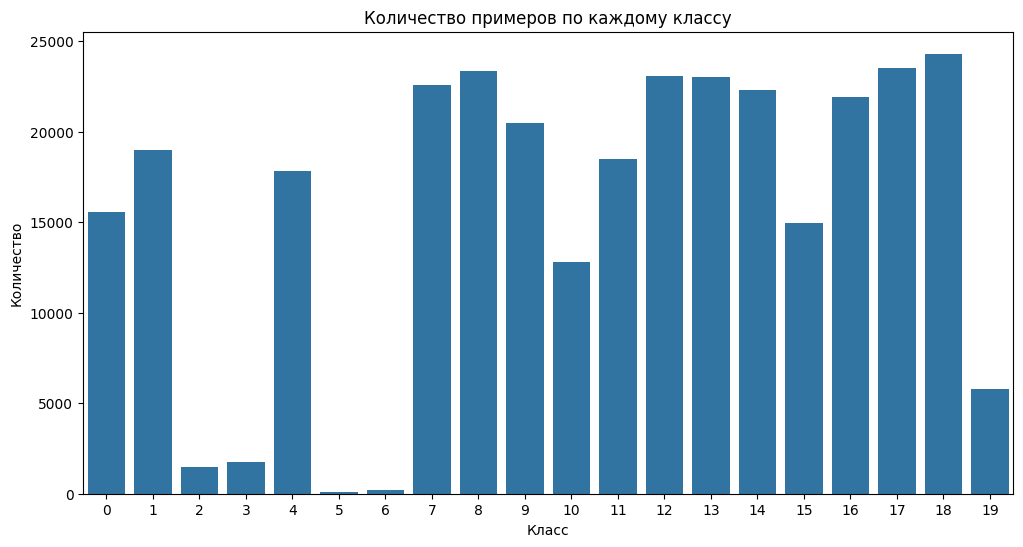

In [6]:
import numpy as np

train_df['labels_array'] = train_df['labels'].apply(lambda x: np.array(list(map(int, x.split()))))

label_counts = np.sum(np.vstack(train_df['labels_array']), axis=0)

plt.figure(figsize=(12, 6))
sns.barplot(x=list(range(20)), y=label_counts)
plt.title("Количество примеров по каждому классу")
plt.xlabel("Класс")
plt.ylabel("Количество")
plt.show()

Сильный дисбаланс классов. Примеров в классах 2,3,5,6 катастрофически мало

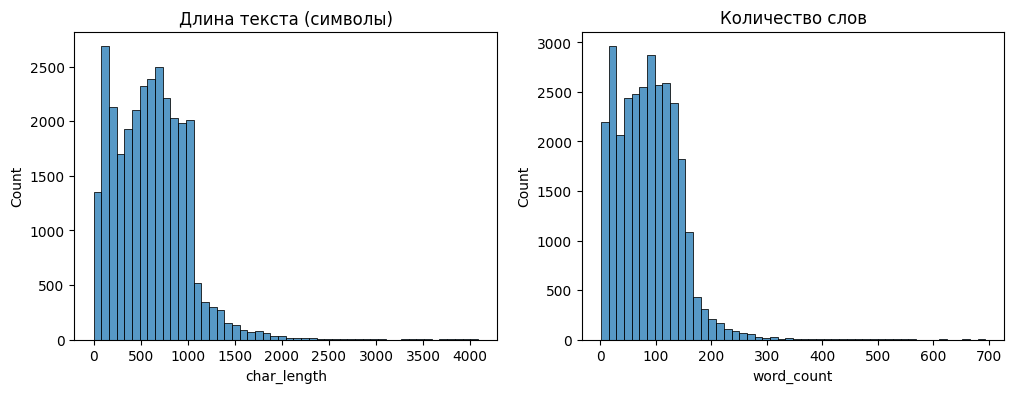

In [7]:
train_df['char_length'] = train_df['text'].apply(len)
train_df['word_count'] = train_df['text'].apply(lambda x: len(x.split()))

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
sns.histplot(train_df['char_length'], bins=50)
plt.title("Длина текста (символы)")

plt.subplot(1, 2, 2)
sns.histplot(train_df['word_count'], bins=50)
plt.title("Количество слов")
plt.show()

In [8]:
top_classes = np.argsort(-label_counts)[:3]

for class_id in top_classes:
    print(f"\nТексты для класса {class_id}:")
    sample_texts = train_df[train_df['labels_array'].apply(lambda x: x[class_id] == 1)]['text'].sample(3)
    for text in sample_texts:
        print("-", text[:200] + "...")


Тексты для класса 18:
- 10-11 февраля
Мотогонки на льду - Чемпионата России
суперлига
Начало в 14–00
https://vk.com/club46940341
Невского 17, стадион «Строитель»
📍
Билеты приобретаем в кассах стадиона в дни гонок:
Западная т...
- Спектакль «Свидание вслепую»
🏛
Дворец искусств Ленинградской области
🗓
4 октября 19:00
🎫
Билеты по ссылке здесь
💚
-30% по промокоду СВИДАНИЕ30
«Свидание вслепую» - самый смешной спектакль этой весны п...
- с 15 апреля
«Школа щенка» от первого дня до 6 месяцев
🦮
В программе: две онлайн встречи, два индивидуальных занятия, общий чат, онлайн поддержка в течении всего месяца, ответы на ваши вопросы, полезны...

Тексты для класса 17:
- Город чужой — дом свой
❤️
Бронируйте апартаменты
на Яндекс
🌍
Путешествиях с кешбэком до 25% при оплате по СБП. Личная кухня, холодильник, стиральная машина — ведите хозяйство как привыкли даже за тыся...
- 3 сентября (сб) 16:00-21:00
🍋
Квартирник на раскрытие сексуальности + дерзкая эротическая фотосессия «Позволь себе быть той, кем

Анонсы и описания разных мероприятий: класс 18 — спортивные и развлекательные события, класс 17 — тренинги, культурные и личностные активности, класс 8 — концерты, музеи и акции с билетами. Cодержат даты, места и ссылки для участия, много эмодзи

1. TF-IDF + Нейронная сеть

In [19]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

nltk.download('stopwords')
nltk.download('punkt')
nltk.download('punkt_tab')
morph = MorphAnalyzer()
russian_stopwords = set(stopwords.words('russian'))

def clean_text_tfidf(text):
    # Приводим текст к нижнему регистру и убираем нежелательные символы
    text = re.sub(r'http\S+|www\S+|https\S+|#\w+|@\w+', '', text, flags=re.MULTILINE)
    text = re.sub(r'[^\w\s-]', '', text)
    text = text.lower()

    # Токенизация (разбиение на слова)
    tokens = text.split()

    # Удаляем стоп-слова и лемматизируем
    tokens = [morph.parse(token)[0].normal_form for token in tokens if token not in russian_stopwords]

    return " ".join(tokens)

text = "Дарим скидку 20% по промокоду premiere_tnp\nПервый показ! 28 сентября."
clean_text_tfidf(text)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


'дарить скидка 20 промокод premiere_tnp первый показ 28 сентябрь'

Удаление URL, эмодзи, стоп-слов, цифр

2. Word2Vec + Нейронная сеть

In [ ]:
def clean_text_w2v(text):
    text = re.sub(r'https?://\S+|www\.\S+', '', text)
    text = re.sub(r'[^\w\s@%-]', ' ', text)
    text = re.sub(r'([a-z])([A-Z])', r'\1 \2', text)
    return text.lower()

text = "Промокод premiereTnp скидка 20%"
clean_text_w2v(text)

'промокод premiere tnp скидка 20%'

Удаление URL, разделение слитных слов

3. CNN (встроенный эмбеддинг)

In [ ]:
def clean_text_cnn(text):
    text = re.sub(r'https?://\S+|www\.\S+', '', text)
    text = re.sub(r'[^\w\s%-]', ' ', text)
    text = text.replace('\n', ' ')
    return text

text = "Скидка -30% до 31 декабря!\nБилеты: www.example.com"
clean_text_cnn(text)

'Скидка -30% до 31 декабря  Билеты  '

Удаление URL, сохранение % и дефисов

4. RNN (встроенный эмбеддинг)

In [ ]:
from datetime import datetime

def clean_text_rnn(text):
    text = re.sub(r'\b\d{1,2}\s(января|февраля|...|декабря)\b', 'дата', text)
    text = re.sub(r'https?://\S+|www\.\S+', '', text)
    text = re.sub(r'[^\w\s]', ' ', text)
    return text

text = "Показ 28 сентября в 19:00"
clean_text_rnn(text)

'Показ 28 сентября в 19 00'

Замена дат/времени на токены, удаление URL

5. BERT-like модели

In [ ]:
def clean_text_bert(text):
    text = re.sub(r'https?://\S+|www\.\S+', '', text)
    text = text.replace('\n', ' ')
    return text[:3000]

text = "Промокод: premiere_tnp\nДействует до 30 ноября."
clean_text_bert(text)

'Промокод: premiere_tnp Действует до 30 ноября.'

Только удаление URL и переносов строк

1. TF-IDF + Нейронная сеть (модель для выбивания скора на каггле)

In [24]:
import re
import string
import pandas as pd
import numpy as np
from tqdm import tqdm
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from pymorphy3 import MorphAnalyzer
import torch
from torch import nn, optim
from torch.utils.data import Dataset, DataLoader
from sklearn.metrics import f1_score
import matplotlib.pyplot as plt

In [27]:
import re
from pymorphy3 import MorphAnalyzer
from nltk.corpus import stopwords
import nltk

nltk.download("stopwords")

morph = MorphAnalyzer()
russian_stopwords = set(stopwords.words("russian"))

def clean_text(text):
    text = text.lower()
    text = re.sub(r'[^а-яё ]', ' ', text)
    tokens = text.split()
    tokens = [morph.parse(token)[0].normal_form for token in tokens if token not in russian_stopwords]
    return ' '.join(tokens)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [29]:
df = pd.read_csv('/content/data/train.csv')  # колонки: id, text, labels
df['clean_text'] = df['text'].apply(clean_text)

# мультилабел — labels: '0 1 0 1 ...'
df['labels'] = df['labels'].apply(lambda x: list(map(int, x.split())))
labels = np.array(df['labels'].tolist())

tfidf = TfidfVectorizer(max_features=3000)
X = tfidf.fit_transform(df['clean_text']).toarray()

X_train, X_val, y_train, y_val = train_test_split(X, labels, test_size=0.2, random_state=42)

In [30]:
class TfidfDataset(Dataset):
    def __init__(self, X, y):
        self.X = torch.tensor(X, dtype=torch.float32)
        self.y = torch.tensor(y, dtype=torch.float32)

    def __len__(self):
        return len(self.X)

    def __getitem__(self, idx):
        return self.X[idx], self.y[idx]

train_dataset = TfidfDataset(X_train, y_train)
val_dataset = TfidfDataset(X_val, y_val)

train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=64)

In [31]:
class SimpleNN(nn.Module):
    def __init__(self, input_dim, output_dim):
        super().__init__()
        self.net = nn.Sequential(
            nn.Linear(input_dim, 512),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(512, output_dim),
            nn.Sigmoid()
        )

    def forward(self, x):
        return self.net(x)

model = SimpleNN(input_dim=3000, output_dim=20).cuda()

In [32]:
def train_model(
    model, train_loader, val_loader,
    epochs=20, lr=1e-3, warmup_epochs=2,
    early_stopping_patience=4,
    save_path='best_model.pth'
):
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    model.to(device)

    criterion = nn.BCELoss()
    optimizer = optim.AdamW(model.parameters(), lr=lr)

    def lr_lambda(current_epoch):
        if current_epoch < warmup_epochs:
            return float(current_epoch + 1) / float(warmup_epochs)
        return 1.0

    scheduler = optim.lr_scheduler.LambdaLR(optimizer, lr_lambda)

    best_f1 = 0
    patience = 0

    train_losses, val_losses = [], []
    val_f1s = []

    for epoch in range(epochs):
        model.train()
        total_loss = 0
        for X_batch, y_batch in train_loader:
            X_batch, y_batch = X_batch.to(device), y_batch.to(device)

            optimizer.zero_grad()
            outputs = model(X_batch)
            loss = criterion(outputs, y_batch)
            loss.backward()
            optimizer.step()

            total_loss += loss.item()

        train_losses.append(total_loss / len(train_loader))
        scheduler.step()

        # Validation
        model.eval()
        val_loss = 0
        preds, targets = [], []
        with torch.no_grad():
            for X_batch, y_batch in val_loader:
                X_batch, y_batch = X_batch.to(device), y_batch.to(device)
                outputs = model(X_batch)
                loss = criterion(outputs, y_batch)
                val_loss += loss.item()

                preds.append((outputs > 0.5).int().cpu())
                targets.append(y_batch.int().cpu())

        preds = torch.cat(preds)
        targets = torch.cat(targets)
        f1 = f1_score(targets, preds, average='macro')

        val_losses.append(val_loss / len(val_loader))
        val_f1s.append(f1)

        print(f"Epoch {epoch+1}/{epochs} - Train Loss: {train_losses[-1]:.4f} - Val Loss: {val_losses[-1]:.4f} - Val F1: {f1:.4f}")

        # Early stopping
        if f1 > best_f1:
            best_f1 = f1
            patience = 0
            torch.save(model.state_dict(), save_path)
        else:
            patience += 1
            if patience >= early_stopping_patience:
                print("Early stopping.")
                break

    # Графики
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(train_losses, label='Train Loss')
    plt.plot(val_losses, label='Val Loss')
    plt.legend()
    plt.title('Losses')

    plt.subplot(1, 2, 2)
    plt.plot(val_f1s, label='Val F1')
    plt.legend()
    plt.title('Validation F1')
    plt.show()

Epoch 1/20 - Train Loss: 0.4064 - Val Loss: 0.3042 - Val F1: 0.7001
Epoch 2/20 - Train Loss: 0.2596 - Val Loss: 0.2360 - Val F1: 0.7489
Epoch 3/20 - Train Loss: 0.2150 - Val Loss: 0.2153 - Val F1: 0.7857
Epoch 4/20 - Train Loss: 0.1931 - Val Loss: 0.2066 - Val F1: 0.7970
Epoch 5/20 - Train Loss: 0.1790 - Val Loss: 0.2022 - Val F1: 0.8062
Epoch 6/20 - Train Loss: 0.1683 - Val Loss: 0.1999 - Val F1: 0.8148
Epoch 7/20 - Train Loss: 0.1593 - Val Loss: 0.1996 - Val F1: 0.8215
Epoch 8/20 - Train Loss: 0.1518 - Val Loss: 0.1991 - Val F1: 0.8269
Epoch 9/20 - Train Loss: 0.1447 - Val Loss: 0.1997 - Val F1: 0.8289
Epoch 10/20 - Train Loss: 0.1375 - Val Loss: 0.2007 - Val F1: 0.8291
Epoch 11/20 - Train Loss: 0.1318 - Val Loss: 0.2007 - Val F1: 0.8352
Epoch 12/20 - Train Loss: 0.1262 - Val Loss: 0.2022 - Val F1: 0.8343
Epoch 13/20 - Train Loss: 0.1205 - Val Loss: 0.2044 - Val F1: 0.8352
Epoch 14/20 - Train Loss: 0.1149 - Val Loss: 0.2056 - Val F1: 0.8369
Epoch 15/20 - Train Loss: 0.1100 - Val Loss

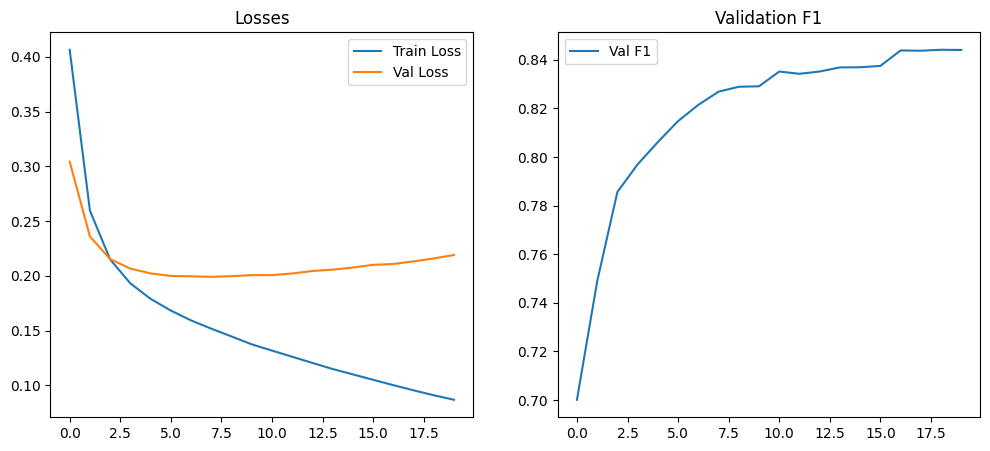

In [33]:
model = SimpleNN(input_dim=3000, output_dim=20)
train_model(model, train_loader, val_loader)

In [37]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
device

device(type='cuda')

In [38]:
test_df = pd.read_csv("/content/data/test.csv")  # колонки: id, text
test_df['clean_text'] = test_df['text'].apply(clean_text)
X_test = tfidf.transform(test_df['clean_text']).toarray()

test_tensor = torch.tensor(X_test, dtype=torch.float32).to(device)
model.load_state_dict(torch.load("best_model.pth"))
model.eval()

with torch.no_grad():
    outputs = model(test_tensor)
    preds = (outputs > 0.5).int().cpu().numpy()

# Сбор финального сабмита
submission = pd.DataFrame({
    "id": test_df["id"],
    "labels": [" ".join(map(str, row)) for row in preds]
})
submission.to_csv("submission.csv", index=False)

2. Word2Vec + Нейронная сеть

In [ ]:
import re
import numpy as np
import pandas as pd
import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader
from tqdm import tqdm
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from gensim.models import Word2Vec
from nltk.tokenize import word_tokenize
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
train_df = pd.read_csv('/content/data/train.csv')
train_df['labels'] = train_df['labels'].apply(lambda x: list(map(int, x.strip().split())))
y = np.array(train_df['labels'].tolist())
X_train, X_val, y_train, y_val = train_test_split(train_df['text'], y, test_size=0.2, random_state=42)

X_train_clean = X_train.apply(clean_text_w2v)
X_val_clean = X_val.apply(clean_text_w2v)

In [ ]:
train_sentences = [word_tokenize(text) for text in X_train_clean]
w2v_model = Word2Vec(sentences=train_sentences, vector_size=300, window=5, min_count=2, workers=4)

In [ ]:
def text_to_avg_vector(text, model):
    words = word_tokenize(text)
    vectors = [model.wv[word] for word in words if word in model.wv]
    return np.mean(vectors, axis=0) if vectors else np.zeros(model.vector_size)

X_train_w2v = np.array([text_to_avg_vector(text, w2v_model) for text in X_train_clean])
X_val_w2v = np.array([text_to_avg_vector(text, w2v_model) for text in X_val_clean])

X_train_tensor = torch.tensor(X_train_w2v, dtype=torch.float32)
X_val_tensor = torch.tensor(X_val_w2v, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32)
y_val_tensor = torch.tensor(y_val, dtype=torch.float32)

In [ ]:
class TextDataset(Dataset):
    def __init__(self, X, y):
        self.X = X
        self.y = y

    def __len__(self):
        return len(self.X)

    def __getitem__(self, idx):
        return self.X[idx], self.y[idx]

train_dataset = TextDataset(X_train_tensor, y_train_tensor)
val_dataset = TextDataset(X_val_tensor, y_val_tensor)
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=64)

In [ ]:
class W2V_NN(nn.Module):
    def __init__(self, input_size, output_size):
        super().__init__()
        self.fc1 = nn.Linear(input_size, 512)
        self.bn1 = nn.BatchNorm1d(512)
        self.drop1 = nn.Dropout(0.5)
        self.fc2 = nn.Linear(512, 256)
        self.bn2 = nn.BatchNorm1d(256)
        self.drop2 = nn.Dropout(0.3)
        self.fc3 = nn.Linear(256, output_size)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = self.bn1(x)
        x = self.drop1(x)
        x = torch.relu(self.fc2(x))
        x = self.bn2(x)
        x = self.drop2(x)
        x = self.fc3(x)
        return self.sigmoid(x)

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model_w2v = W2V_NN(300, y_train.shape[1]).to(device)

In [ ]:
def validate(model, val_loader, criterion):
    model.eval()
    val_loss = 0.0
    all_preds = []
    all_labels = []
    with torch.no_grad():
        for inputs, labels in val_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            val_loss += loss.item() * inputs.size(0)
            all_preds.append(outputs.cpu())
            all_labels.append(labels.cpu())
    val_loss /= len(val_loader.dataset)
    all_preds = torch.cat(all_preds).numpy()
    all_labels = torch.cat(all_labels).numpy()
    return val_loss, all_preds, all_labels

In [ ]:
def find_best_threshold(y_true, y_probs):
    best_thresh = 0.5
    best_f1 = 0
    for thresh in np.arange(0.1, 0.9, 0.01):
        preds = (y_probs > thresh).astype(int)
        f1 = f1_score(y_true, preds, average='micro')  # или 'macro' в зависимости от задачи
        if f1 > best_f1:
            best_f1 = f1
            best_thresh = thresh
    return best_thresh, best_f1

In [ ]:
from sklearn.metrics import f1_score

criterion = nn.BCELoss()
optimizer = torch.optim.Adam(model_w2v.parameters(), lr=0.001)
scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='min', factor=0.5, patience=2, verbose=True)

best_val_loss = float('inf')
best_val_f1 = 0
best_threshold = 0.5
patience = 5
counter = 0

for epoch in range(50):
    model_w2v.train()
    train_loss = 0.0

    for inputs, labels in tqdm(train_loader, desc=f'Epoch {epoch+1}'):
        inputs, labels = inputs.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = model_w2v(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        train_loss += loss.item() * inputs.size(0)

    train_loss /= len(train_loader.dataset)

    val_loss, val_preds, val_labels = validate(model_w2v, val_loader, criterion)
    scheduler.step(val_loss)

    # Подбираем лучший порог по F1 на валидации
    threshold, val_f1 = find_best_threshold(val_labels, val_preds)

    print(f'Epoch {epoch+1} Train Loss: {train_loss:.4f} Val Loss: {val_loss:.4f} Val F1: {val_f1:.4f} Best Threshold: {threshold:.2f}')

    if val_loss < best_val_loss or val_f1 > best_val_f1:
        best_val_loss = val_loss
        best_val_f1 = val_f1
        best_threshold = threshold
        torch.save(model_w2v.state_dict(), 'best_w2v_model.pth')
        counter = 0
    else:
        counter += 1
        if counter >= patience:
            print("Early stopping triggered")
            break

Epoch 1: 100%|██████████| 370/370 [00:02<00:00, 162.55it/s]


Epoch 1 Train Loss: 0.2842 Val Loss: 0.2627 Val F1: 0.8936 Best Threshold: 0.51


Epoch 2: 100%|██████████| 370/370 [00:01<00:00, 268.69it/s]


Epoch 2 Train Loss: 0.2785 Val Loss: 0.2570 Val F1: 0.8947 Best Threshold: 0.48


Epoch 3: 100%|██████████| 370/370 [00:01<00:00, 350.43it/s]


Epoch 3 Train Loss: 0.2743 Val Loss: 0.2560 Val F1: 0.8956 Best Threshold: 0.50


Epoch 4: 100%|██████████| 370/370 [00:01<00:00, 358.32it/s]


Epoch 4 Train Loss: 0.2711 Val Loss: 0.2563 Val F1: 0.8959 Best Threshold: 0.50


Epoch 5: 100%|██████████| 370/370 [00:02<00:00, 175.60it/s]


Epoch 5 Train Loss: 0.2689 Val Loss: 0.2538 Val F1: 0.8958 Best Threshold: 0.48


Epoch 6: 100%|██████████| 370/370 [00:00<00:00, 374.87it/s]


Epoch 6 Train Loss: 0.2675 Val Loss: 0.2513 Val F1: 0.8972 Best Threshold: 0.50


Epoch 7: 100%|██████████| 370/370 [00:00<00:00, 376.05it/s]


Epoch 7 Train Loss: 0.2636 Val Loss: 0.2461 Val F1: 0.9005 Best Threshold: 0.50


Epoch 8: 100%|██████████| 370/370 [00:00<00:00, 380.30it/s]


Epoch 8 Train Loss: 0.2620 Val Loss: 0.2470 Val F1: 0.8980 Best Threshold: 0.46


Epoch 9: 100%|██████████| 370/370 [00:01<00:00, 299.22it/s]


Epoch 9 Train Loss: 0.2603 Val Loss: 0.2418 Val F1: 0.9014 Best Threshold: 0.44


Epoch 10: 100%|██████████| 370/370 [00:01<00:00, 352.31it/s]


Epoch 10 Train Loss: 0.2597 Val Loss: 0.2427 Val F1: 0.9011 Best Threshold: 0.47


Epoch 11: 100%|██████████| 370/370 [00:01<00:00, 367.37it/s]


Epoch 11 Train Loss: 0.2592 Val Loss: 0.2386 Val F1: 0.9027 Best Threshold: 0.46


Epoch 12: 100%|██████████| 370/370 [00:01<00:00, 365.23it/s]


Epoch 12 Train Loss: 0.2565 Val Loss: 0.2393 Val F1: 0.9022 Best Threshold: 0.46


Epoch 13: 100%|██████████| 370/370 [00:01<00:00, 354.68it/s]


Epoch 13 Train Loss: 0.2563 Val Loss: 0.2409 Val F1: 0.9011 Best Threshold: 0.48


Epoch 14: 100%|██████████| 370/370 [00:01<00:00, 286.53it/s]


Epoch 14 Train Loss: 0.2568 Val Loss: 0.2402 Val F1: 0.9019 Best Threshold: 0.47


Epoch 15: 100%|██████████| 370/370 [00:00<00:00, 377.11it/s]


Epoch 15 Train Loss: 0.2502 Val Loss: 0.2356 Val F1: 0.9043 Best Threshold: 0.46


Epoch 16: 100%|██████████| 370/370 [00:01<00:00, 368.50it/s]


Epoch 16 Train Loss: 0.2500 Val Loss: 0.2339 Val F1: 0.9053 Best Threshold: 0.48


Epoch 17: 100%|██████████| 370/370 [00:00<00:00, 381.81it/s]


Epoch 17 Train Loss: 0.2476 Val Loss: 0.2346 Val F1: 0.9047 Best Threshold: 0.45


Epoch 18: 100%|██████████| 370/370 [00:00<00:00, 382.03it/s]


Epoch 18 Train Loss: 0.2471 Val Loss: 0.2296 Val F1: 0.9072 Best Threshold: 0.47


Epoch 19: 100%|██████████| 370/370 [00:01<00:00, 274.21it/s]


Epoch 19 Train Loss: 0.2449 Val Loss: 0.2321 Val F1: 0.9059 Best Threshold: 0.47


Epoch 20: 100%|██████████| 370/370 [00:00<00:00, 372.14it/s]


Epoch 20 Train Loss: 0.2441 Val Loss: 0.2295 Val F1: 0.9067 Best Threshold: 0.47


Epoch 21: 100%|██████████| 370/370 [00:01<00:00, 362.18it/s]


Epoch 21 Train Loss: 0.2447 Val Loss: 0.2308 Val F1: 0.9064 Best Threshold: 0.47


Epoch 22: 100%|██████████| 370/370 [00:00<00:00, 380.07it/s]


Epoch 22 Train Loss: 0.2431 Val Loss: 0.2303 Val F1: 0.9065 Best Threshold: 0.48


Epoch 23: 100%|██████████| 370/370 [00:01<00:00, 366.95it/s]


Epoch 23 Train Loss: 0.2423 Val Loss: 0.2288 Val F1: 0.9068 Best Threshold: 0.48


Epoch 24: 100%|██████████| 370/370 [00:01<00:00, 296.18it/s]


Epoch 24 Train Loss: 0.2418 Val Loss: 0.2285 Val F1: 0.9066 Best Threshold: 0.46


Epoch 25: 100%|██████████| 370/370 [00:00<00:00, 373.12it/s]


Epoch 25 Train Loss: 0.2411 Val Loss: 0.2301 Val F1: 0.9065 Best Threshold: 0.46


Epoch 26: 100%|██████████| 370/370 [00:00<00:00, 374.01it/s]


Epoch 26 Train Loss: 0.2411 Val Loss: 0.2285 Val F1: 0.9068 Best Threshold: 0.47


Epoch 27: 100%|██████████| 370/370 [00:01<00:00, 366.33it/s]


Epoch 27 Train Loss: 0.2406 Val Loss: 0.2281 Val F1: 0.9070 Best Threshold: 0.46


Epoch 28: 100%|██████████| 370/370 [00:01<00:00, 356.42it/s]


Epoch 28 Train Loss: 0.2400 Val Loss: 0.2271 Val F1: 0.9070 Best Threshold: 0.47


Epoch 29: 100%|██████████| 370/370 [00:01<00:00, 276.20it/s]


Epoch 29 Train Loss: 0.2404 Val Loss: 0.2279 Val F1: 0.9064 Best Threshold: 0.48


Epoch 30: 100%|██████████| 370/370 [00:01<00:00, 355.71it/s]


Epoch 30 Train Loss: 0.2394 Val Loss: 0.2274 Val F1: 0.9073 Best Threshold: 0.47


Epoch 31: 100%|██████████| 370/370 [00:00<00:00, 378.12it/s]


Epoch 31 Train Loss: 0.2387 Val Loss: 0.2274 Val F1: 0.9072 Best Threshold: 0.48


Epoch 32: 100%|██████████| 370/370 [00:01<00:00, 355.20it/s]


Epoch 32 Train Loss: 0.2363 Val Loss: 0.2250 Val F1: 0.9088 Best Threshold: 0.48


Epoch 33: 100%|██████████| 370/370 [00:01<00:00, 354.40it/s]


Epoch 33 Train Loss: 0.2342 Val Loss: 0.2268 Val F1: 0.9081 Best Threshold: 0.47


Epoch 34: 100%|██████████| 370/370 [00:01<00:00, 302.38it/s]


Epoch 34 Train Loss: 0.2349 Val Loss: 0.2251 Val F1: 0.9084 Best Threshold: 0.47


Epoch 35: 100%|██████████| 370/370 [00:00<00:00, 384.43it/s]


Epoch 35 Train Loss: 0.2339 Val Loss: 0.2239 Val F1: 0.9090 Best Threshold: 0.46


Epoch 36: 100%|██████████| 370/370 [00:00<00:00, 378.04it/s]


Epoch 36 Train Loss: 0.2338 Val Loss: 0.2234 Val F1: 0.9090 Best Threshold: 0.46


Epoch 37: 100%|██████████| 370/370 [00:00<00:00, 385.40it/s]


Epoch 37 Train Loss: 0.2331 Val Loss: 0.2272 Val F1: 0.9090 Best Threshold: 0.47


Epoch 38: 100%|██████████| 370/370 [00:01<00:00, 286.67it/s]


Epoch 38 Train Loss: 0.2330 Val Loss: 0.2226 Val F1: 0.9092 Best Threshold: 0.49


Epoch 39: 100%|██████████| 370/370 [00:00<00:00, 376.04it/s]


Epoch 39 Train Loss: 0.2327 Val Loss: 0.2207 Val F1: 0.9099 Best Threshold: 0.48


Epoch 40: 100%|██████████| 370/370 [00:01<00:00, 368.42it/s]


Epoch 40 Train Loss: 0.2317 Val Loss: 0.2224 Val F1: 0.9096 Best Threshold: 0.48


Epoch 41: 100%|██████████| 370/370 [00:00<00:00, 380.14it/s]


Epoch 41 Train Loss: 0.2315 Val Loss: 0.2223 Val F1: 0.9096 Best Threshold: 0.48


Epoch 42: 100%|██████████| 370/370 [00:01<00:00, 360.62it/s]


Epoch 42 Train Loss: 0.2320 Val Loss: 0.2209 Val F1: 0.9104 Best Threshold: 0.48


Epoch 43: 100%|██████████| 370/370 [00:01<00:00, 292.99it/s]


Epoch 43 Train Loss: 0.2304 Val Loss: 0.2202 Val F1: 0.9101 Best Threshold: 0.48


Epoch 44: 100%|██████████| 370/370 [00:01<00:00, 360.62it/s]


Epoch 44 Train Loss: 0.2302 Val Loss: 0.2211 Val F1: 0.9101 Best Threshold: 0.46


Epoch 45: 100%|██████████| 370/370 [00:01<00:00, 355.14it/s]


Epoch 45 Train Loss: 0.2295 Val Loss: 0.2200 Val F1: 0.9103 Best Threshold: 0.47


Epoch 46: 100%|██████████| 370/370 [00:01<00:00, 369.75it/s]


Epoch 46 Train Loss: 0.2288 Val Loss: 0.2214 Val F1: 0.9104 Best Threshold: 0.50


Epoch 47: 100%|██████████| 370/370 [00:01<00:00, 355.18it/s]


Epoch 47 Train Loss: 0.2294 Val Loss: 0.2212 Val F1: 0.9101 Best Threshold: 0.49


Epoch 48: 100%|██████████| 370/370 [00:01<00:00, 300.03it/s]


Epoch 48 Train Loss: 0.2292 Val Loss: 0.2221 Val F1: 0.9091 Best Threshold: 0.48


Epoch 49: 100%|██████████| 370/370 [00:01<00:00, 348.19it/s]


Epoch 49 Train Loss: 0.2287 Val Loss: 0.2207 Val F1: 0.9102 Best Threshold: 0.47


Epoch 50: 100%|██████████| 370/370 [00:00<00:00, 372.21it/s]


Epoch 50 Train Loss: 0.2269 Val Loss: 0.2197 Val F1: 0.9105 Best Threshold: 0.48


In [ ]:
import pandas as pd

test_df = pd.read_csv('/content/data/test.csv')  # замените на свой путь к файлу

X_test_clean = test_df['text'].apply(clean_text_w2v)

X_test_w2v = np.array([text_to_avg_vector(text, w2v_model) for text in X_test_clean])
X_test_tensor = torch.tensor(X_test_w2v, dtype=torch.float32).to(device)


model_w2v.load_state_dict(torch.load('best_w2v_model.pth'))
model_w2v.eval()

with torch.no_grad():
    outputs = model_w2v(X_test_tensor)

preds = (outputs > best_threshold).int().cpu().numpy()  # <-- используем лучший порог

labels_str = [''.join(map(str, row)) for row in preds]

In [ ]:
test_ids = test_df['id'].values

submission = pd.DataFrame({
    'id': test_ids,
    'labels': labels_str
})

submission['labels'] = submission['labels'].apply(lambda x: ' '.join(list(x)))

submission.to_csv('submission_2.csv', index=False)

3) Встроенный эмбеддинг в нейросетевое решение на свёрточных сетях

In [ ]:
import pandas as pd
import numpy as np
import re
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import Dataset, DataLoader
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MultiLabelBinarizer
from tqdm import tqdm
import matplotlib.pyplot as plt
import nltk
from nltk.tokenize import word_tokenize
from collections import Counter

nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
df = pd.read_csv('/content/data/train.csv')
df['text'] = df['text'].apply(clean_text_cnn)
df['labels'] = df['labels'].apply(lambda x: list(map(int, x.strip().split())))

df['text_clean'] = df['text'].apply(clean_text_cnn)

X = df['text_clean']
y = np.array(df['labels'].tolist())

X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [ ]:
tokenized_train = [word_tokenize(text) for text in X_train]
tokenized_val = [word_tokenize(text) for text in X_val]

all_words = [word for sent in tokenized_train for word in sent]
word_counts = Counter(all_words)
vocab = ['<PAD>', '<UNK>'] + [word for word, count in word_counts.items() if count >= 2]
word2idx = {word: idx for idx, word in enumerate(vocab)}

In [ ]:
def text_to_indices(tokens, word2idx, max_len=100):
    indices = [word2idx.get(word, word2idx['<UNK>']) for word in tokens]
    if len(indices) < max_len:
        indices += [word2idx['<PAD>']] * (max_len - len(indices))
    else:
        indices = indices[:max_len]
    return indices

X_train_idx = [text_to_indices(tokens, word2idx) for tokens in tokenized_train]
X_val_idx = [text_to_indices(tokens, word2idx) for tokens in tokenized_val]

X_train_tensor = torch.tensor(X_train_idx, dtype=torch.long)
X_val_tensor = torch.tensor(X_val_idx, dtype=torch.long)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32)
y_val_tensor = torch.tensor(y_val, dtype=torch.float32)

In [ ]:
class TextDataset(Dataset):
    def __init__(self, X, y):
        self.X = X
        self.y = y
    def __len__(self):
        return len(self.X)
    def __getitem__(self, idx):
        return self.X[idx], self.y[idx]

train_dataset = TextDataset(X_train_tensor, y_train_tensor)
val_dataset = TextDataset(X_val_tensor, y_val_tensor)

train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=64)

In [ ]:
class CNNTextClassifier(nn.Module):
    def __init__(self, vocab_size, embed_dim, num_classes):
        super().__init__()
        self.embedding = nn.Embedding(vocab_size, embed_dim, padding_idx=0)
        self.conv1 = nn.Conv1d(embed_dim, 128, kernel_size=3, padding=1)
        self.pool = nn.AdaptiveMaxPool1d(1)
        self.fc1 = nn.Linear(128, 64)
        self.fc2 = nn.Linear(64, num_classes)

    def forward(self, x):
        x = self.embedding(x)  # [B, T, D]
        x = x.permute(0, 2, 1)  # [B, D, T]
        x = F.relu(self.conv1(x))
        x = self.pool(x).squeeze(2)
        x = F.relu(self.fc1(x))
        return torch.sigmoid(self.fc2(x))

model = CNNTextClassifier(len(vocab), 128, y.shape[1]).to(device)

In [ ]:
criterion = nn.BCELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=3, gamma=0.5)
early_stopping_patience = 5
best_val_loss = float('inf')
early_stop_counter = 0

train_losses, val_losses = [], []

def evaluate(model, loader):
    model.eval()
    total_loss = 0
    with torch.no_grad():
        for x, y in loader:
            x = x.to(device)
            y = y.to(device)
            outputs = model(x)
            loss = criterion(outputs, y)
            total_loss += loss.item()
    return total_loss / len(loader)

for epoch in range(20):
    model.train()
    total_loss = 0
    for x, y in tqdm(train_loader, desc=f'Epoch {epoch+1}'):
        x = x.to(device)
        y = y.to(device)

        optimizer.zero_grad()
        outputs = model(x)
        loss = criterion(outputs, y)
        loss.backward()
        optimizer.step()

        total_loss += loss.item()

    train_loss = total_loss / len(train_loader)
    val_loss = evaluate(model, val_loader)
    scheduler.step()

    train_losses.append(train_loss)
    val_losses.append(val_loss)

    print(f"Epoch {epoch+1}: Train Loss = {train_loss:.4f}, Val Loss = {val_loss:.4f}")

    if val_loss < best_val_loss:
        best_val_loss = val_loss
        torch.save(model.state_dict(), "best_cnn_model.pth")
        early_stop_counter = 0
    else:
        early_stop_counter += 1
        if early_stop_counter >= early_stopping_patience:
            print("Early stopping.")
            break

Epoch 1: 100%|██████████| 370/370 [00:03<00:00, 110.04it/s]


Epoch 1: Train Loss = 0.3444, Val Loss = 0.2748


Epoch 2: 100%|██████████| 370/370 [00:02<00:00, 159.62it/s]


Epoch 2: Train Loss = 0.2431, Val Loss = 0.2433


Epoch 3: 100%|██████████| 370/370 [00:03<00:00, 116.79it/s]


Epoch 3: Train Loss = 0.2017, Val Loss = 0.2309


Epoch 4: 100%|██████████| 370/370 [00:02<00:00, 181.40it/s]


Epoch 4: Train Loss = 0.1671, Val Loss = 0.2244


Epoch 5: 100%|██████████| 370/370 [00:02<00:00, 181.38it/s]


Epoch 5: Train Loss = 0.1504, Val Loss = 0.2271


Epoch 6: 100%|██████████| 370/370 [00:02<00:00, 178.95it/s]


Epoch 6: Train Loss = 0.1360, Val Loss = 0.2249


Epoch 7: 100%|██████████| 370/370 [00:02<00:00, 159.31it/s]


Epoch 7: Train Loss = 0.1203, Val Loss = 0.2257


Epoch 8: 100%|██████████| 370/370 [00:02<00:00, 166.64it/s]


Epoch 8: Train Loss = 0.1129, Val Loss = 0.2300


Epoch 9: 100%|██████████| 370/370 [00:02<00:00, 181.30it/s]


Epoch 9: Train Loss = 0.1064, Val Loss = 0.2329
Early stopping.


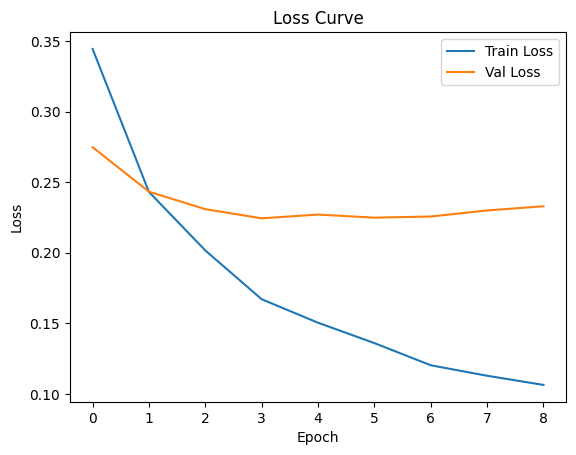

In [ ]:
plt.plot(train_losses, label='Train Loss')
plt.plot(val_losses, label='Val Loss')
plt.legend()
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Loss Curve")
plt.show()

In [ ]:
import pandas as pd
import torch
from torch.utils.data import DataLoader, Dataset
import numpy as np

# Загрузка модели
model.load_state_dict(torch.load("best_cnn_model.pth"))
model.eval()

# Устройство
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

# Функция очистки текста (предположим, она у тебя уже есть)
# def clean_text_cnn(text): ...

# Функция для преобразования токенов в индексы
def text_to_indices(tokens, word2idx, max_len=100):
    indices = [word2idx.get(word, word2idx['<UNK>']) for word in tokens]
    if len(indices) < max_len:
        indices += [word2idx['<PAD>']] * (max_len - len(indices))
    else:
        indices = indices[:max_len]
    return indices

# Создание word2idx из vocab, если vocab — список
word2idx = {word: idx for idx, word in enumerate(vocab)}

# Загрузка тестовых данных
test_df = pd.read_csv('/content/data/test.csv')
test_texts = test_df['text'].apply(clean_text_cnn)

# Преобразование в последовательности
test_sequences = [text_to_indices(text, word2idx) for text in test_texts]
test_tensor = torch.tensor(test_sequences, dtype=torch.long)

# Кастомный Dataset только с X
class TestDataset(Dataset):
    def __init__(self, X):
        self.X = X
    def __len__(self):
        return len(self.X)
    def __getitem__(self, idx):
        return self.X[idx]

test_dataset = TestDataset(test_tensor)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)

# Предсказания
all_preds = []
with torch.no_grad():
    for x in test_loader:
        x = x.to(device)
        outputs = model(x)
        preds = (outputs > 0.5).int().cpu().numpy()
        all_preds.append(preds)

# Склеиваем в финальный массив
all_preds = np.vstack(all_preds)

# Форматируем строки в нужный формат для сабмита
labels_str = [' '.join(map(str, row)) for row in all_preds]

# Генерация submission
submission = pd.DataFrame({
    'id': test_df['id'],
    'labels': labels_str
})

submission.to_csv('submission_3.csv', index=False)
print("Сабмит сохранён в submission_3.csv ✅")

Сабмит сохранён в submission_3.csv ✅


In [ ]:
4) Встроенный эмбеддинг в нейросетевое решение на рекуррентных сетях

In [ ]:
import pandas as pd
import numpy as np
import re
import torch
from sklearn.model_selection import train_test_split
from torch.utils.data import Dataset, DataLoader
from tqdm import tqdm
import matplotlib.pyplot as plt
from torch import nn
from transformers import get_cosine_schedule_with_warmup

In [ ]:
#!pip install tqdm

In [ ]:
import pandas as pd
import numpy as np
import re
import torch
from torch import nn
from torch.utils.data import Dataset, DataLoader
from sklearn.model_selection import train_test_split
from collections import Counter
from tqdm import tqdm
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv("/content/data/train.csv")
df['text'] = df['text'].apply(clean_text_rnn)

labels = df['labels'].apply(lambda x: pd.Series(list(map(int, x.split()))))
labels.columns = [f"label_{i}" for i in range(20)]
df = pd.concat([df, labels], axis=1)

In [ ]:
all_text = " ".join(df["text"].tolist()).split()
vocab = Counter(all_text)
vocab = {word: i+2 for i, (word, _) in enumerate(vocab.items())}
vocab["<PAD>"] = 0
vocab["<UNK>"] = 1

def encode_text(text, vocab, max_len=100):
    tokens = text.split()
    ids = [vocab.get(token, 1) for token in tokens]
    if len(ids) < max_len:
        ids += [0] * (max_len - len(ids))
    else:
        ids = ids[:max_len]
    return ids

In [ ]:
class TextDataset(Dataset):
    def __init__(self, texts, labels, vocab, max_len=100):
        self.texts = [torch.tensor(encode_text(t, vocab, max_len)) for t in texts]
        self.labels = torch.tensor(labels.values).float()

    def __len__(self):
        return len(self.texts)

    def __getitem__(self, idx):
        return self.texts[idx], self.labels[idx]

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(
    df["text"], df[[f"label_{i}" for i in range(20)]],
    test_size=0.2, random_state=42
)

train_dataset = TextDataset(X_train, y_train, vocab)
val_dataset = TextDataset(X_val, y_val, vocab)

train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=64)

In [ ]:
class RNNModel(nn.Module):
    def __init__(self, vocab_size, embed_dim=128, hidden_dim=128, output_dim=20):
        super().__init__()
        self.embedding = nn.Embedding(vocab_size, embed_dim, padding_idx=0)
        self.rnn = nn.LSTM(embed_dim, hidden_dim, batch_first=True)
        self.fc = nn.Linear(hidden_dim, output_dim)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        x = self.embedding(x)
        _, (h_n, _) = self.rnn(x)
        out = self.fc(h_n[-1])
        return self.sigmoid(out)

Epoch 1: 100%|██████████| 370/370 [00:04<00:00, 76.09it/s] 


Epoch 1: Train Loss=0.3633, Val Loss=0.3122


Epoch 2: 100%|██████████| 370/370 [00:03<00:00, 109.19it/s]


Epoch 2: Train Loss=0.2902, Val Loss=0.2785


Epoch 3: 100%|██████████| 370/370 [00:03<00:00, 102.44it/s]


Epoch 3: Train Loss=0.2563, Val Loss=0.2568


Epoch 4: 100%|██████████| 370/370 [00:05<00:00, 71.32it/s]


Epoch 4: Train Loss=0.2310, Val Loss=0.2495


Epoch 5: 100%|██████████| 370/370 [00:06<00:00, 58.10it/s]


Epoch 5: Train Loss=0.2172, Val Loss=0.2440


Epoch 6: 100%|██████████| 370/370 [00:03<00:00, 100.80it/s]


Epoch 6: Train Loss=0.2043, Val Loss=0.2401


Epoch 7: 100%|██████████| 370/370 [00:03<00:00, 94.45it/s] 


Epoch 7: Train Loss=0.1906, Val Loss=0.2381


Epoch 8: 100%|██████████| 370/370 [00:03<00:00, 104.88it/s]


Epoch 8: Train Loss=0.1837, Val Loss=0.2381


Epoch 9: 100%|██████████| 370/370 [00:03<00:00, 97.49it/s] 


Epoch 9: Train Loss=0.1770, Val Loss=0.2382


Epoch 10: 100%|██████████| 370/370 [00:03<00:00, 108.77it/s]


Epoch 10: Train Loss=0.1700, Val Loss=0.2384


Epoch 11: 100%|██████████| 370/370 [00:03<00:00, 107.49it/s]


Epoch 11: Train Loss=0.1665, Val Loss=0.2389


Epoch 12: 100%|██████████| 370/370 [00:03<00:00, 105.98it/s]


Epoch 12: Train Loss=0.1632, Val Loss=0.2400
Early stopping.


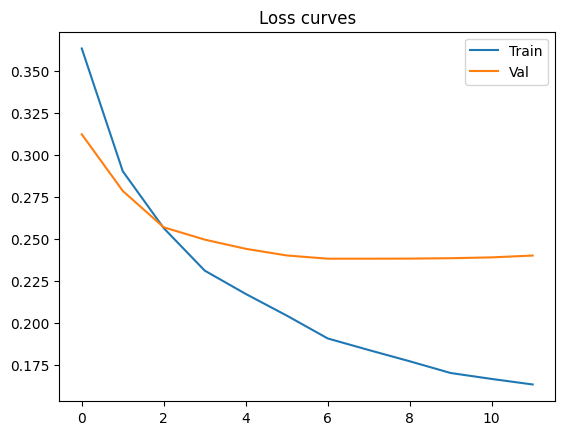

In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

model = RNNModel(vocab_size=len(vocab)).to(device)
criterion = nn.BCELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)
scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=3, gamma=0.5)

best_val_loss = float('inf')
early_stop_counter = 0
patience = 5

train_losses, val_losses = [], []

for epoch in range(20):
    model.train()
    total_loss = 0
    for x, y in tqdm(train_loader, desc=f"Epoch {epoch+1}"):
        x, y = x.to(device), y.to(device)
        optimizer.zero_grad()
        outputs = model(x)
        loss = criterion(outputs, y)
        loss.backward()
        optimizer.step()
        total_loss += loss.item()

    train_loss = total_loss / len(train_loader)
    train_losses.append(train_loss)

    # validation
    model.eval()
    val_loss = 0
    with torch.no_grad():
        for x, y in val_loader:
            x, y = x.to(device), y.to(device)
            outputs = model(x)
            loss = criterion(outputs, y)
            val_loss += loss.item()
    val_loss /= len(val_loader)
    val_losses.append(val_loss)

    print(f"Epoch {epoch+1}: Train Loss={train_loss:.4f}, Val Loss={val_loss:.4f}")

    if val_loss < best_val_loss:
        best_val_loss = val_loss
        early_stop_counter = 0
        torch.save(model.state_dict(), "best_model.pth")
    else:
        early_stop_counter += 1
        if early_stop_counter >= patience:
            print("Early stopping.")
            break

    scheduler.step()

plt.plot(train_losses, label="Train")
plt.plot(val_losses, label="Val")
plt.legend()
plt.title("Loss curves")
plt.show()

In [ ]:
test_df = pd.read_csv("/content/data/test.csv")
test_df["text"] = test_df["text"].apply(clean_text_rnn)

class TestDataset(Dataset):
    def __init__(self, texts, vocab, max_len=100):
        self.texts = [torch.tensor(encode_text(t, vocab, max_len)) for t in texts]
        self.ids = texts.index

    def __len__(self):
        return len(self.texts)

    def __getitem__(self, idx):
        return self.texts[idx], self.ids[idx]

test_dataset = TestDataset(test_df["text"], vocab)
test_loader = DataLoader(test_dataset, batch_size=64)

model.load_state_dict(torch.load("best_model.pth"))
model.eval()

results = []
ids_list = []

with torch.no_grad():
    for x, ids in test_loader:
        x = x.to(device)
        outputs = model(x)
        preds = (outputs > 0.5).int().cpu().numpy()
        results.extend(preds)
        ids_list.extend(ids)

submission = pd.DataFrame({
    "id": test_df["id"],
    "labels": [" ".join(map(str, row)) for row in results]
})
submission.to_csv("submission_4.csv", index=False)

(5) Эмбеддер + решение на bert-like моделях (любой вид)

In [ ]:
import pandas as pd
import re
from sklearn.model_selection import train_test_split

df = pd.read_csv('/content/data/train.csv')
df['text'] = df['text'].apply(clean_text_bert)

labels = df['labels'].apply(lambda x: list(map(int, x.split())))
labels_df = pd.DataFrame(labels.tolist(), columns=[f'label_{i}' for i in range(20)])
df = pd.concat([df, labels_df], axis=1)

X_train, X_val, y_train, y_val = train_test_split(
    df['text'], labels_df, test_size=0.2, random_state=42
)

In [ ]:
from torch.utils.data import Dataset
from transformers import AutoTokenizer
import torch

tokenizer = AutoTokenizer.from_pretrained('distilbert-base-uncased')

class TextDataset(Dataset):
    def __init__(self, texts, labels=None, tokenizer=tokenizer, max_len=256):
        self.encodings = tokenizer(list(texts), truncation=True, padding=True, max_length=max_len)
        self.labels = torch.tensor(labels.values).float() if labels is not None else None

    def __len__(self):
        return len(self.encodings['input_ids'])

    def __getitem__(self, idx):
        item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
        if self.labels is not None:
            item['labels'] = self.labels[idx]
        return item

train_dataset = TextDataset(X_train, y_train)
val_dataset = TextDataset(X_val, y_val)

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/483 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

In [ ]:
from torch.utils.data import DataLoader

train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=16)

In [ ]:
import torch.nn as nn
from transformers import AutoModel
import torch

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

class BertClassifier(nn.Module):
    def __init__(self, model_name='distilbert-base-uncased', num_labels=20):
        super().__init__()
        self.bert = AutoModel.from_pretrained(model_name)
        self.dropout = nn.Dropout(0.3)
        self.classifier = nn.Linear(self.bert.config.hidden_size, num_labels)

    def forward(self, input_ids, attention_mask):
        outputs = self.bert(input_ids=input_ids, attention_mask=attention_mask)
        pooled_output = outputs.last_hidden_state[:, 0]
        pooled_output = self.dropout(pooled_output)
        return torch.sigmoid(self.classifier(pooled_output))

model = BertClassifier().to(device)

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

In [ ]:
from transformers import get_scheduler
import torch.optim as optim

optimizer = optim.AdamW(model.parameters(), lr=2e-5)
num_epochs = 10
num_training_steps = len(train_loader) * num_epochs

scheduler = get_scheduler(
    "linear",
    optimizer=optimizer,
    num_warmup_steps=500,
    num_training_steps=num_training_steps
)

criterion = nn.BCELoss()

Train Epoch 1: 100%|██████████| 1479/1479 [08:53<00:00,  2.77it/s]


Epoch 1 - Train Loss: 0.2230, Val Loss: 0.2318


Train Epoch 2: 100%|██████████| 1479/1479 [08:52<00:00,  2.78it/s]


Epoch 2 - Train Loss: 0.2056, Val Loss: 0.2277


Train Epoch 3: 100%|██████████| 1479/1479 [08:52<00:00,  2.78it/s]


Epoch 3 - Train Loss: 0.1903, Val Loss: 0.2244


Train Epoch 4: 100%|██████████| 1479/1479 [08:53<00:00,  2.77it/s]


Epoch 4 - Train Loss: 0.1782, Val Loss: 0.2225


Train Epoch 5: 100%|██████████| 1479/1479 [08:52<00:00,  2.78it/s]


Epoch 5 - Train Loss: 0.1679, Val Loss: 0.2223


Train Epoch 6: 100%|██████████| 1479/1479 [08:52<00:00,  2.78it/s]


Epoch 6 - Train Loss: 0.1606, Val Loss: 0.2210


Train Epoch 7: 100%|██████████| 1479/1479 [08:52<00:00,  2.77it/s]


Epoch 7 - Train Loss: 0.1550, Val Loss: 0.2204


Train Epoch 8: 100%|██████████| 1479/1479 [08:52<00:00,  2.78it/s]


Epoch 8 - Train Loss: 0.1539, Val Loss: 0.2204


Train Epoch 9: 100%|██████████| 1479/1479 [08:52<00:00,  2.78it/s]


Epoch 9 - Train Loss: 0.1540, Val Loss: 0.2204


Train Epoch 10: 100%|██████████| 1479/1479 [08:52<00:00,  2.78it/s]


Epoch 10 - Train Loss: 0.1536, Val Loss: 0.2204
Early stopping


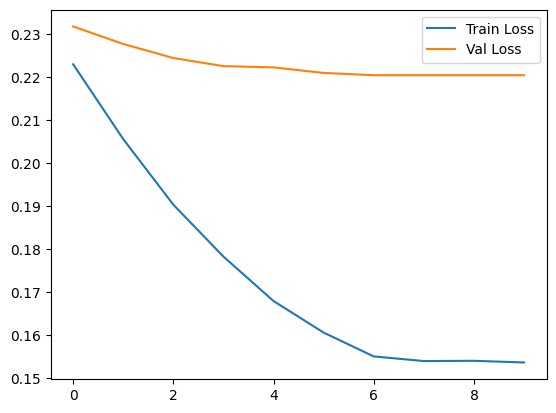

In [ ]:
from tqdm import tqdm
import matplotlib.pyplot as plt

best_val_loss = float('inf')
early_stop_counter = 0
patience = 3

train_losses = []
val_losses = []

for epoch in range(num_epochs):
    model.train()
    total_train_loss = 0
    for batch in tqdm(train_loader, desc=f"Train Epoch {epoch+1}"):
        input_ids = batch['input_ids'].to(device)
        attention_mask = batch['attention_mask'].to(device)
        labels = batch['labels'].to(device)

        optimizer.zero_grad()
        outputs = model(input_ids, attention_mask)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        scheduler.step()

        total_train_loss += loss.item()

    avg_train_loss = total_train_loss / len(train_loader)
    train_losses.append(avg_train_loss)

    model.eval()
    total_val_loss = 0
    with torch.no_grad():
        for batch in val_loader:
            input_ids = batch['input_ids'].to(device)
            attention_mask = batch['attention_mask'].to(device)
            labels = batch['labels'].to(device)
            outputs = model(input_ids, attention_mask)
            loss = criterion(outputs, labels)
            total_val_loss += loss.item()

    avg_val_loss = total_val_loss / len(val_loader)
    val_losses.append(avg_val_loss)

    print(f"Epoch {epoch+1} - Train Loss: {avg_train_loss:.4f}, Val Loss: {avg_val_loss:.4f}")

    if avg_val_loss < best_val_loss:
        best_val_loss = avg_val_loss
        torch.save(model.state_dict(), 'best_bert_model.pth')
        early_stop_counter = 0
    else:
        early_stop_counter += 1
        if early_stop_counter >= patience:
            print('Early stopping')
            break

plt.plot(train_losses, label='Train Loss')
plt.plot(val_losses, label='Val Loss')
plt.legend()
plt.show()

In [ ]:
test_df = pd.read_csv('/content/data/test.csv')
test_df['text'] = test_df['text'].apply(clean_text_bert)

test_dataset = TextDataset(test_df['text'], labels=None)
test_loader = DataLoader(test_dataset, batch_size=16)

model.load_state_dict(torch.load('best_bert_model.pth'))
model.eval()

predictions = []
with torch.no_grad():
    for batch in test_loader:
        input_ids = batch['input_ids'].to(device)
        attention_mask = batch['attention_mask'].to(device)
        outputs = model(input_ids, attention_mask)
        preds = (outputs > 0.5).int().cpu().numpy()
        predictions.extend(preds)

submission = pd.DataFrame({
    'id': test_df['id'],
    'labels': [' '.join(map(str, row)) for row in predictions]
})

submission.to_csv('submission_5.csv', index=False)

4. Запросить у модели декодер сгенерировать примеры с тем же распределением меток, что и у данных. Обогатить этими данными датасет (добавить хотя бы 1000 наблюдений). Проверить свой лучший пайплайн на улучшение/уменьшение качества модели вместе со сгенерированными данными. Сделать выводы и объяснить результат.

In [51]:
from transformers import GPT2Tokenizer, GPT2LMHeadModel
import torch
import numpy as np

# Загружаем ruGPT-2 или просто GPT-2
model_name = 'sberbank-ai/rugpt3small_based_on_gpt2'  # пример для русского
tokenizer = GPT2Tokenizer.from_pretrained(model_name)
model = GPT2LMHeadModel.from_pretrained(model_name).to('cuda')

# Функция генерации текста с prompt с метками
def generate_text_with_labels(labels, max_length=100):
    # Формируем prompt, метки через пробел
    prompt = '[Метки]: ' + ' '.join(str(l) for l in labels) + '\n[Текст]: '
    input_ids = tokenizer.encode(prompt, return_tensors='pt').to('cuda')
    output = model.generate(
        input_ids,
        max_length=max_length + len(input_ids[0]),
        do_sample=True,
        temperature=0.8,
        top_k=50,
        top_p=0.95,
        num_return_sequences=1,
        pad_token_id=tokenizer.eos_token_id
    )
    generated = tokenizer.decode(output[0], skip_special_tokens=True)
    # Обрезаем до сгенерированного текста
    return generated.split('[Текст]: ')[-1]

# Пример
labels_example = [1,0,0,0,1,0,0,0,1,0,0,0,1,1,1,1,1,0,0,1]
print(generate_text_with_labels(labels_example))

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/1.25k [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.71M [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/1.27M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/574 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/720 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/551M [00:00<?, ?B/s]

The attention mask is not set and cannot be inferred from input because pad token is same as eos token. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.


 1 0 0 0 0 1 0 0 1 0 0 0 1 0 1 0 1 0 1 0 0 1 0 1 0 1 0 1
